   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low


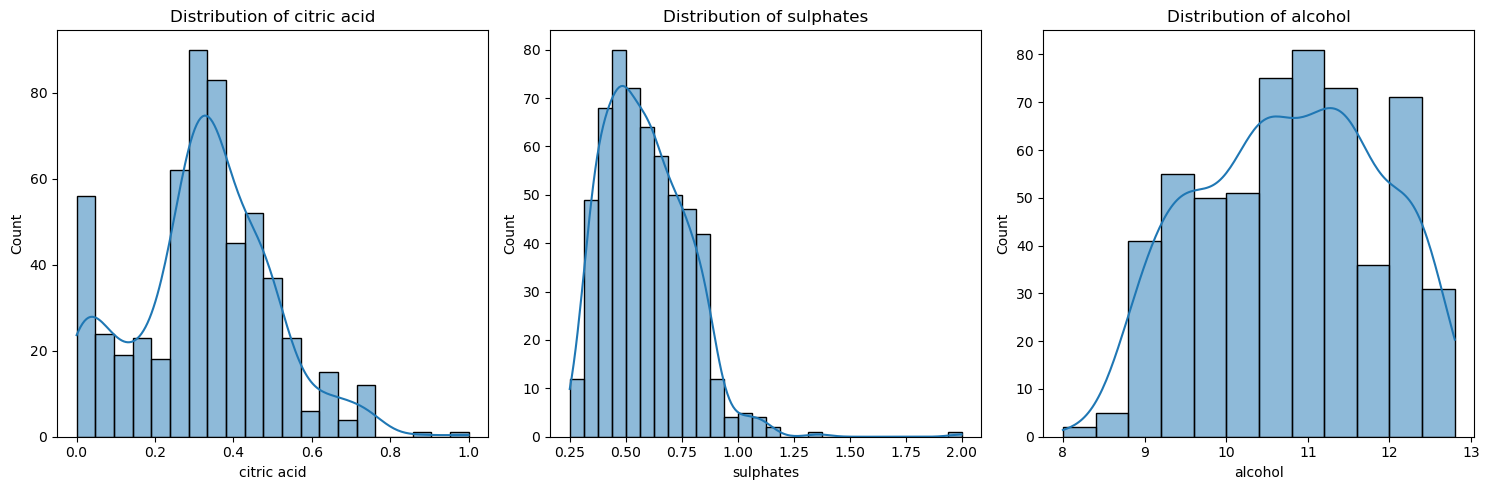

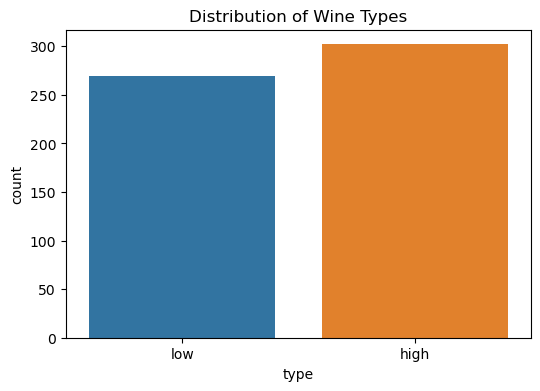

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('red_wine.csv')

# Display the first few rows of the dataset
print(data.head())

# Create histograms for continuous variables
plt.figure(figsize=(15, 5))

for i, col in enumerate(['citric acid', 'sulphates', 'alcohol']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Create a count plot for the categorical variable 'type'
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=data)
plt.title('Distribution of Wine Types')
plt.show()

In [10]:
# Create and evaluate a logistic regression model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load your dataset
wine_data = pd.read_csv('red_wine.csv')  # Replace 'path_to_your_file' with the actual path to your dataset

# Encoding the target variable 'type'
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

# Splitting the dataset into features (X) and target (y)
X = wine_data[['citric acid', 'sulphates', 'alcohol']]
y = wine_data['type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Outputting the first few predictions as a sample
y_pred[:5]

array([0, 0, 1, 0, 0])

In [11]:
# train the L1-regularized logistic regression model and 
# generate the results for model accuracy, confusion matrix, and classification report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
wine_data = pd.read_csv('red_wine.csv')  # Replace with the actual path to your dataset

# Encoding the target variable 'type'
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

# Splitting the dataset into features (X) and target (y)
X = wine_data[['citric acid', 'sulphates', 'alcohol']]
y = wine_data['type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training an L1-regularized logistic regression model
l1_logistic_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
l1_logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_l1 = l1_logistic_model.predict(X_test)

# Calculating metrics
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
classification_rep_l1 = classification_report(y_test, y_pred_l1)

# Displaying the results
print("Accuracy:", accuracy_l1)
print("Confusion Matrix:\n", conf_matrix_l1)
print("Classification Report:\n", classification_rep_l1)

Accuracy: 0.7739130434782608
Confusion Matrix:
 [[45 13]
 [13 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        58
           1       0.77      0.77      0.77        57

    accuracy                           0.77       115
   macro avg       0.77      0.77      0.77       115
weighted avg       0.77      0.77      0.77       115

